In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from operator import attrgetter

In [2]:
dflistings = pd.read_csv('listings_barcelona.csv', delimiter = ',')
dfneighbourhoods = pd.read_csv('neighbourhoods_barcelona.csv', delimiter = ',')
dfreviews = pd.read_csv('reviews.csv', delimiter = ',')

In [3]:
print(dflistings.shape)
print(dfneighbourhoods.shape)
print(dfreviews.shape)

(15655, 75)
(73, 2)
(673737, 6)


In [4]:
print(dflistings.columns.tolist())
print(dfneighbourhoods.columns.tolist())
print(dfreviews.columns.tolist())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [5]:
print(dflistings.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


In [6]:
print(dfneighbourhoods.dtypes)
print(dfreviews.dtypes)

neighbourhood_group    object
neighbourhood          object
dtype: object
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


In [ ]:
dfneighbourhoods.head(5)

,neighbourhood_group,neighbourhood
0,Ciutat Vella,el Barri Gòtic
1,Ciutat Vella,el Raval
2,Ciutat Vella,la Barceloneta
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera"
4,Eixample,el Fort Pienc


In [7]:
dfreviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,18674,4808211,2013-05-27,4841196,Caron,"Great location. Clean, spacious flat. Would re..."
1,18674,10660311,2014-03-02,11600277,Juan Carlos,Mi mejor recomendación para este departamento....
2,18674,41087522,2015-08-04,35231385,Shlomi,"Big apartment, well equipped.\r<br/>Very good ..."
3,18674,81000756,2016-06-20,23223644,Joost,The Check in was fast and flexible. The price ...
4,18674,278588962,2018-06-18,4756672,Marius,Great location and enough space in the apartme...


Unimos los datasets de Listings y Reviews a través de su nexo: dfreviews.listing_id ⟶ corresponde a dflistings.id



In [8]:
# Merge para tener información de cada review + los atributos del listing
dfmerged = dfreviews.merge(dflistings, left_on='listing_id', right_on='id', how='left')

# Convertimos la fecha
dfmerged['date'] = pd.to_datetime(dfmerged['date'])

In [9]:
print(dfmerged.shape)
print(dfmerged.columns.tolist())

(673737, 81)
['listing_id', 'id_x', 'date', 'reviewer_id', 'reviewer_name', 'comments', 'id_y', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated'

In [10]:
# Vemos en completo el head del nuevo dataframe incluyendo todas las columnas
pd.set_option('display.max_columns', None)
dfmerged.head(5)

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,4808211,2013-05-27,4841196,Caron,"Great location. Clean, spacious flat. Would re...",18674,https://www.airbnb.com/rooms/18674,20230314070701,2023-03-14,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Spain","We are Mireia (43) & Maria (45), two multiling...",within an hour,99%,94%,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,la Sagrada Família,43.0,44.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.40556,2.17262,Entire rental unit,Entire home/apt,8,NaN,2 baths,3.0,6.0,"[""Coffee maker"", ""Hot water"", ""Shampoo"", ""Iron...",$167.00,1,1125,1.0,5.0,1125.0,1125.0,2.9,1125.0,NaN,t,5,12,23,78,2023-03-14,34,9,0,2013-05-27,2023-02-04,4.33,4.42,4.64,4.79,4.7,4.82,4.3,HUTB-002062,t,24,24,0,0,0.28
1,18674,10660311,2014-03-02,11600277,Juan Carlos,Mi mejor recomendación para este departamento....,18674,https://www.airbnb.com/rooms/18674,20230314070701,2023-03-14,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Spain","We are Mireia (43) & Maria (45), two multiling...",within an hour,99%,94%,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,la Sagrada Família,43.0,44.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.40556,2.17262,Entire rental unit,Entire home/apt,8,NaN,2 baths,3.0,6.0,"[""Coffee maker"", ""Hot water"", ""Shampoo"", ""Iron...",$167.00,1,1125,1.0,5.0,1125.0,1125.0,2.9,1125.0,NaN,t,5,12,23,78,2023-03-14,34,9,0,2013-05-27,2023-02-04,4.33,4.42,4.64,4.79,4.7,4.82,4.3,HUTB-002062,t,24,24,0,0,0.28
2,18674,41087522,2015-08-04,35231385,Shlomi,"Big apartment, well equipped.\r<br/>Very good ...",18674,https://www.airbnb.com/rooms/18674,20230314070701,2023-03-14,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Spain","We are Mireia (43) & Maria (45), two multiling...",wit

In [11]:
# Viendo esto, transformamos a float "price" para estudios futuros
dfmerged['price'] = (
    dfmerged['price']
    .replace('[\$,]', '', regex=True)  # Quita $ y comas si las hay
    .astype(float)
)

In [12]:
# Empezamos viendo valores nulos
nulls = dfmerged.isnull().sum()
nulls = nulls[nulls > 0].sort_values(ascending=False)
display(nulls)

,0
calendar_updated,673737
bathrooms,673737
neighborhood_overview,171007
neighbourhood,171007
host_neighbourhood,142840
host_about,133759
host_location,86623
license,63120
host_response_rate,52651
host_response_time,52651


Ahora imputaremos los NaNs con el método mas adecuado según su data type o según su % de NaNs. También habrá columnas que directamente eliminaremos u omitiremos.

In [13]:
# Ver dtypes solo de columnas con valores nulos
null_columns = dfmerged.columns[dfmerged.isnull().any()]
dtypes_with_nulls = dfmerged[null_columns].dtypes
print(dtypes_with_nulls)

comments                        object
name                            object
description                     object
neighborhood_overview           object
host_name                       object
host_since                      object
host_location                   object
host_about                      object
host_response_time              object
host_response_rate              object
host_acceptance_rate            object
host_is_superhost               object
host_thumbnail_url              object
host_picture_url                object
host_neighbourhood              object
host_listings_count            float64
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
bathrooms                      float64
bathrooms_text                  object
bedrooms                       float64
beds                           float64
calendar_updated         

In [14]:
# Merge para tener información de cada review + los atributos del listing
dfmerged = dfreviews.merge(dflistings, left_on='listing_id', right_on='id', how='left')

# Convertimos la fecha
dfmerged['date'] = pd.to_datetime(dfmerged['date'])

# Initialize dfmerged_clean by copying dfmerged
dfmerged_clean = dfmerged.copy()

In [15]:
# Empezamos por imputar valores numéricos por mediana por tipo de habitación
group_cols = ['bathrooms', 'bedrooms', 'beds']
for col in group_cols:
    # Check if the column exists before attempting to impute
    if col in dfmerged_clean.columns:
        dfmerged_clean[col] = dfmerged_clean.groupby('room_type')[col].transform(lambda x: x.fillna(x.median()))
    else:
        print(f"Warning: Column '{col}' not found in dfmerged_clean. Skipping imputation for this column.")


# Review scores
score_cols = [
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]
for col in score_cols:
     # Check if the column exists before attempting to impute
    if col in dfmerged_clean.columns:
        dfmerged_clean[col] = dfmerged_clean.groupby('room_type')[col].transform(lambda x: x.fillna(x.mean()))
    else:
        print(f"Warning: Column '{col}' not found in dfmerged_clean. Skipping imputation for this column.")

In [16]:
# Rellenamos texto con valores estándar
dfmerged_clean['comments'] = dfmerged_clean['comments'].fillna('Sin comentario')
dfmerged_clean['description'] = dfmerged_clean['description'].fillna('Sin descripción')
dfmerged_clean['name'] = dfmerged_clean['name'].fillna('Sin nombre')

# Rellenamos las variables categóricas con el valor más frecuente
dfmerged_clean['host_response_time'] = dfmerged_clean['host_response_time'].fillna(dfmerged_clean['host_response_time'].mode()[0])

# Convertimos tasas (porcentaje) a float antes de imputar
for rate_col in ['host_response_rate', 'host_acceptance_rate']:
    dfmerged_clean[rate_col] = dfmerged_clean[rate_col].str.replace('%', '').astype(float)
    dfmerged_clean[rate_col] = dfmerged_clean[rate_col].fillna(dfmerged_clean[rate_col].mean())

# Codificamos los booleanos simples
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
for col in bool_cols:
    dfmerged_clean[col] = dfmerged_clean[col].fillna('f')  # o False si conviertes a bool

In [17]:
# Convertimos fechas a datetime
dfmerged_clean['host_since'] = pd.to_datetime(dfmerged_clean['host_since'], errors='coerce')
dfmerged_clean['first_review'] = pd.to_datetime(dfmerged_clean['first_review'], errors='coerce')
dfmerged_clean['last_review'] = pd.to_datetime(dfmerged_clean['last_review'], errors='coerce')

# Eliminar registros sin reviews
dfmerged_clean = dfmerged_clean[dfmerged_clean['first_review'].notnull()]

In [18]:
# Eliminamos las columnas que no vamos a usar
cols_to_drop = [
    'bathrooms', 'calendar_updated', 'neighborhood_overview', 'host_neighbourhood',
    'host_about', 'host_location', 'license', 'bathrooms_text',
    'host_thumbnail_url', 'host_picture_url', 'host_name', 'host_verifications'
]
dfmerged_clean.drop(columns=cols_to_drop, inplace=True)

# Eliminamos la fila con NaN en 'host_since' (es solo 1)
dfmerged_clean = dfmerged_clean[dfmerged_clean['host_since'].notnull()]

# Imputamos las filas numéricas restantes
dfmerged_clean['host_listings_count'].fillna(dfmerged_clean['host_listings_count'].median(), inplace=True)
dfmerged_clean['host_total_listings_count'].fillna(dfmerged_clean['host_total_listings_count'].median(), inplace=True)

# Confirmamos que ya no quedan nulos
nulls_remaining = dfmerged_clean.isnull().sum()
nulls_remaining = nulls_remaining[nulls_remaining > 0]
print("Nulos restantes después de limpieza:\n", nulls_remaining if not nulls_remaining.empty else "✅ Sin nulos")


<ipython-input-18-2679993450>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfmerged_clean['host_listings_count'].fillna(dfmerged_clean['host_listings_count'].median(), inplace=True)
<ipython-input-18-2679993450>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmerged_clean['host_listings_count'].fillna(dfmerged_clean['host_listings_cou

Nulos restantes después de limpieza:
 neighbourhood    171007
dtype: int64


Procedemos ahora con los analisis Univariables y bivariables antes de hacer los cohortes.

In [20]:
# Aseguramos que 'host_since' esté en datetime y extraemos el año
dfmerged_clean['host_since'] = pd.to_datetime(dfmerged_clean['host_since'])
dfmerged_clean['host_year'] = dfmerged_clean['host_since'].dt.year

# Contar anfitriones por año
host_counts = dfmerged_clean['host_year'].value_counts().sort_index().reset_index()
host_counts.columns = ['Year', 'Number of Hosts']

# Crear gráfico de barras con Plotly Express
fig = px.bar(host_counts,
             x='Year',
             y='Number of Hosts',
             title='Number of Hosts by Registration Year',
             labels={'Year': 'Year', 'Number of Hosts': 'Number of Hosts'},
             text='Number of Hosts')

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis=dict(title='Number of Hosts'),
    title_x=0.5,
    template='plotly_white',
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()

In [22]:
# Ensure datetime format and extract year
dfmerged_clean['first_review'] = pd.to_datetime(dfmerged_clean['first_review'])
dfmerged_clean['first_review_year'] = dfmerged_clean['first_review'].dt.year

# Count first reviews per year
review_counts = dfmerged_clean['first_review_year'].value_counts().sort_index().reset_index()
review_counts.columns = ['Year of First Review', 'Number of Reviews']

# Create bar chart
fig = px.bar(review_counts,
             x='Year of First Review',
             y='Number of Reviews',
             title='Distribution of Listings by Year of First Review',
             labels={'Year of First Review': 'Year of First Review', 'Number of Reviews': 'Number of Listings'},
             text='Number of Reviews')

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis_title='Number of Listings',
    title_x=0.5,
    template='plotly_white',
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()

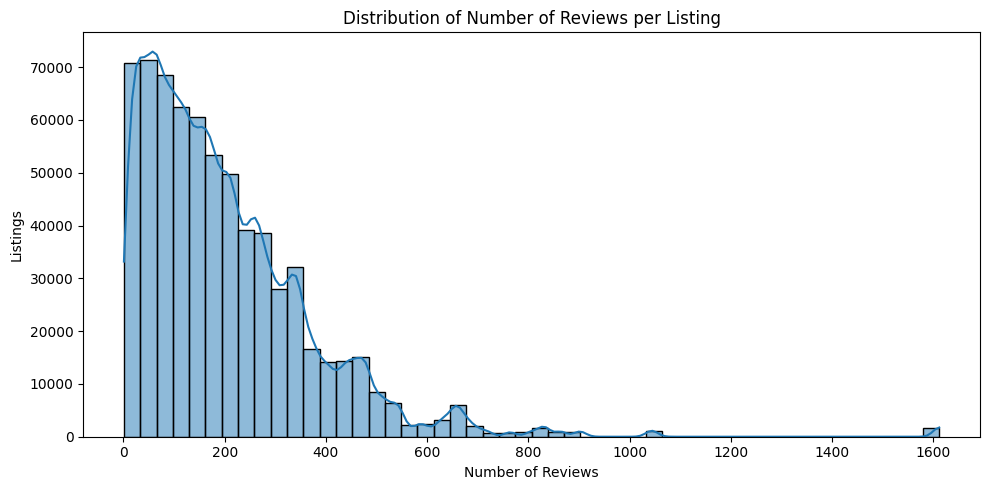

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dfmerged_clean, x='number_of_reviews', bins=50, kde=True)
plt.title('Distribution of Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Listings')
plt.tight_layout()
plt.show()

In [28]:
## Get room type counts
room_type_counts = dfmerged_clean['room_type'].value_counts().reset_index()
room_type_counts.columns = ['Room Type', 'Number of Listings']

# Plot with Plotly Express
fig = px.bar(room_type_counts,
             x='Room Type',
             y='Number of Listings',
             title='Distribution of Listings by Room Type',
             text='Number of Listings')

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Room Type',
    yaxis_title='Number of Listings',
    title_x=0.5,
    template='plotly_white',
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()

In [29]:
# Limpieza de la columna price
dfmerged_clean['price'] = (
    dfmerged_clean['price']
    .replace('[\$,]', '', regex=True)  # elimina $ y comas
    .astype(float)
)

In [30]:
Q1 = dfmerged_clean['price'].quantile(0.25)
Q3 = dfmerged_clean['price'].quantile(0.75)
IQR = Q3 - Q1

# Definimos umbrales (puedes ajustar el factor si es muy agresivo)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos el DataFrame
df_no_outliers = dfmerged_clean[(dfmerged_clean['price'] >= lower_bound) & (dfmerged_clean['price'] <= upper_bound)]


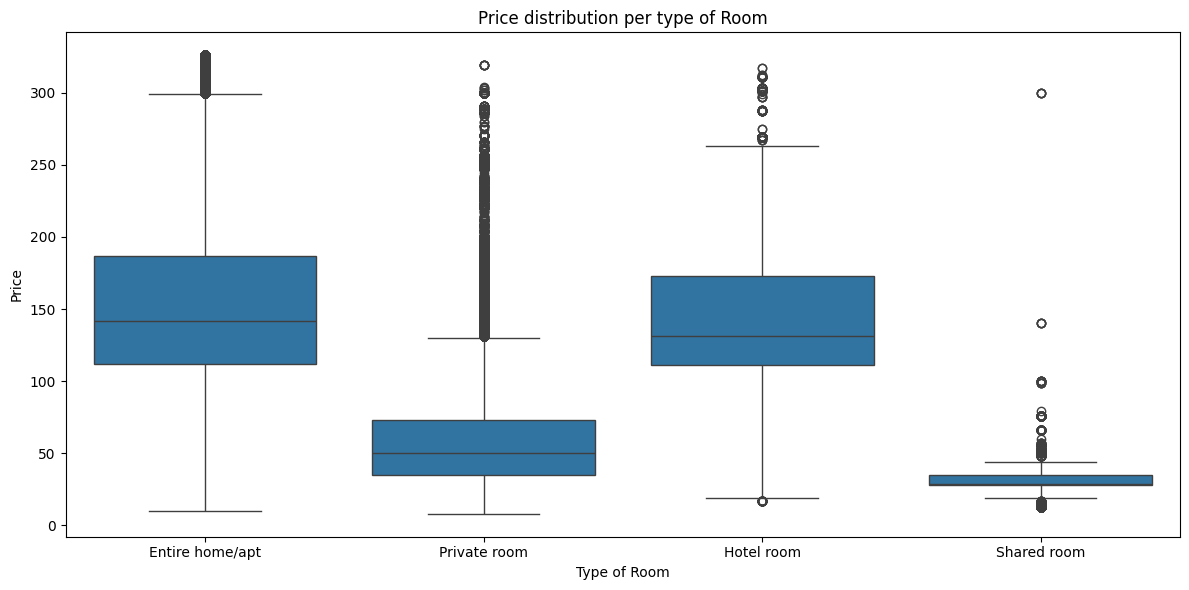

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='room_type', y='price')
plt.title('Price distribution per type of Room')
plt.xlabel('Type of Room')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

Vemos que hay valores muy extremos en el precio así que vamos a hacer un tratamiento de outilers utilizando un límite de valores extremos.  

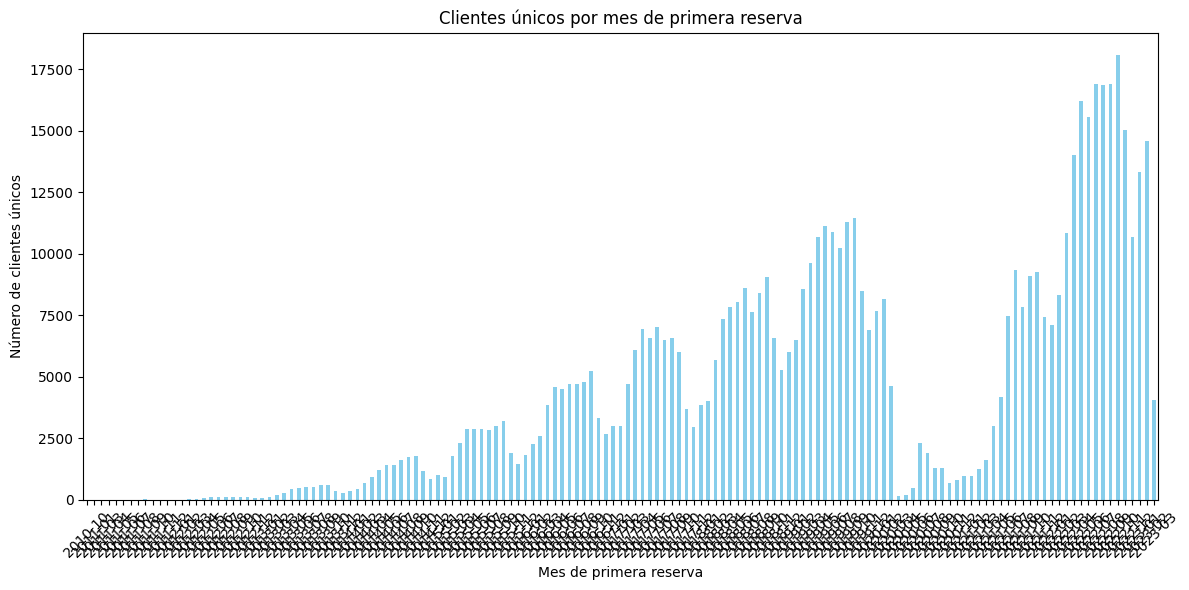

In [33]:
# Convertir a datetime
dfmerged_clean["date"] = pd.to_datetime(dfmerged_clean["date"])

# Encontrar la primera reserva de cada reviewer
first_use = (
    dfmerged_clean.groupby("reviewer_id")["date"]
    .min()
    .reset_index()
    .rename(columns={"date": "first_booking_date"})
)

# Cohorte mensual
first_use["cohort_month"] = first_use["first_booking_date"].dt.to_period("M")

# Conteo de clientes únicos por cohorte
cohort_counts = first_use["cohort_month"].value_counts().sort_index()

# Gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
cohort_counts.plot(kind="bar", color="skyblue")
plt.title("Clientes únicos por mes de primera reserva")
plt.xlabel("Mes de primera reserva")
plt.ylabel("Número de clientes únicos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

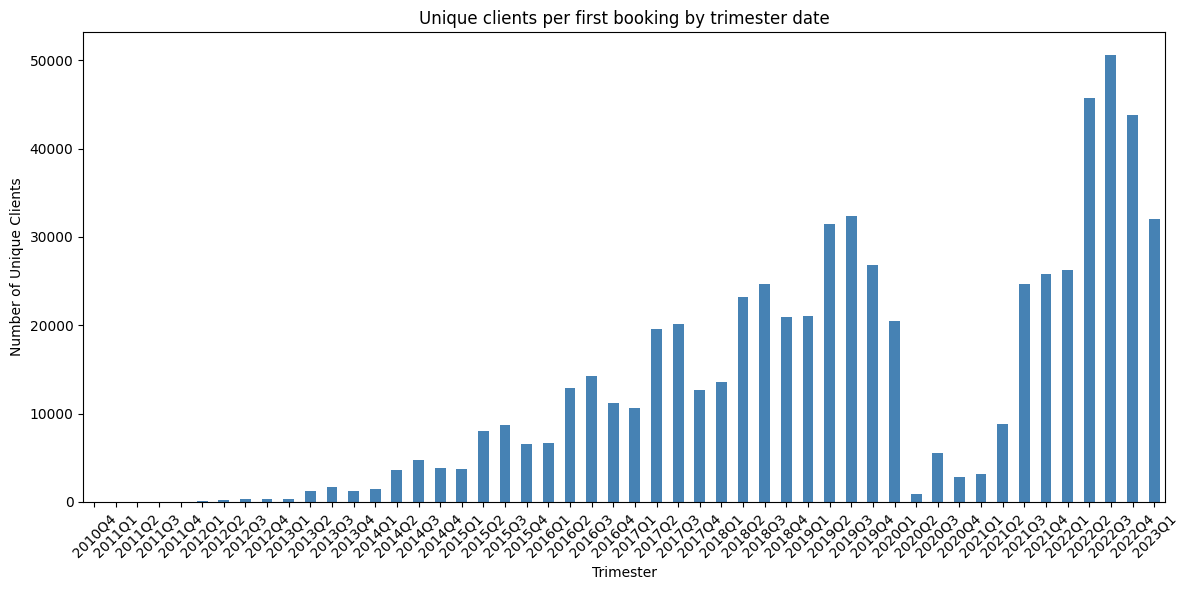

In [36]:
# Agrupamos por trimestre en lugar de mes
first_use["cohort_quarter"] = first_use["first_booking_date"].dt.to_period("Q")

# Conteo por trimestre
cohort_counts_q = first_use["cohort_quarter"].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(12,6))
cohort_counts_q.plot(kind="bar", color="steelblue")
plt.title("Unique clients per first booking by trimester date")
plt.xlabel("Trimester")
plt.ylabel("Number of Unique Clients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el contexto del análisis de cohortes, una cohorte se refiere a un grupo de clientes que comparten una característica o experiencia común en un período de tiempo determinado, generalmente definido por la fecha de su primera interacción con el producto o servicio.

1. En nuestro caso un cohorte será el numero de clientes únicos que usaron por primera vez un airbnb en Barcelona.

2. Cohortes del Life Time Value (LTV) de los hosts, ya que eso nos indicará la revenue que están generando para ellos y la plataforma.

3. Porcentaje de retención de los hosts

4. Cohortes según el tipo de habitacion

In [37]:
# Calculamos el precio de cada host para el cohorte
dfmerged_clean["ltv_host"] = dfmerged_clean["price"] * dfmerged_clean["minimum_nights"] * dfmerged_clean["number_of_reviews"]

In [38]:
# Asegurarse de que 'price' es numérico
dfmerged_clean["price"] = dfmerged_clean["price"].replace('[\$,]', '', regex=True).astype(float)

# Cálculo estimado del LTV por fila
dfmerged_clean["ltv_estimated"] = (
    dfmerged_clean["price"] *
    dfmerged_clean["minimum_nights"] *
    dfmerged_clean["number_of_reviews"]
)

# Agregado por host
ltv_per_host = (
    dfmerged_clean.groupby("host_id")["ltv_estimated"]
    .sum()
    .reset_index()
    .sort_values(by="ltv_estimated", ascending=False)
)

ltv_per_host.head()

,host_id,ltv_estimated
536,3689552,1.432368e+11
2129,37976387,4.663856e+09
367,2585816,4.539780e+09
67,497450,2.178422e+09
803,5878688,1.690231e+09


In [39]:
# Convertir columnas a datetime
dfmerged_clean["host_since"] = pd.to_datetime(dfmerged_clean["host_since"])
dfmerged_clean["last_review"] = pd.to_datetime(dfmerged_clean["last_review"])

# Calcular meses de actividad
dfmerged_clean["host_lifetime_months"] = (
    (dfmerged_clean["last_review"] - dfmerged_clean["host_since"]) / pd.Timedelta(days=30)
)

# Crear cohortes por año de inicio
dfmerged_clean["host_cohort_year"] = dfmerged_clean["host_since"].dt.year

# Vida útil mediana de los hosts por cohorte
retention = (
    dfmerged_clean.groupby("host_cohort_year")["host_lifetime_months"]
    .median()
    .reset_index()
)
retention.columns = ["Cohorte de hosts (año)", "Vida útil mediana (meses)"]

retention

,Cohorte de hosts (año),Vida útil mediana (meses)
0,2008,99.833333
1,2009,165.900000
2,2010,149.566667
3,2011,139.200000
4,2012,127.466667
5,2013,117.900000
6,2014,105.666667
7,2015,92.433333
8,2016,79.533333
9,2017,67.500000


In [40]:
# Calcular límites para recorte (percentiles 1% y 99%)
lower_limit = dfmerged_clean['price'].quantile(0.01)
upper_limit = dfmerged_clean['price'].quantile(0.99)

# Winsorizar (recortar valores fuera de estos límites)
dfmerged_clean['price_winsorized'] = dfmerged_clean['price'].clip(lower_limit, upper_limit)

Hacemos lo mismo con los tipos de habitación según el precio ya que eventualmente calcularemos el LTV (Lifetime Customer Value) y también hay que insonorizar el ruido de los outliers.

In [41]:
dfmerged_clean['price_winsorized'] = dfmerged_clean.groupby('room_type')['price'].transform(
    lambda x: x.clip(x.quantile(0.01), x.quantile(0.99))
)

In [42]:
# Calculo de LTV (Lifetime Customer Value)
# Supuesto: cada review ≈ una estancia
dfmerged_clean['revenue_estimate'] = dfmerged_clean['price_winsorized']

# Agrupar por host
ltv_host = dfmerged_clean.groupby('host_id').agg(
    total_revenue=('revenue_estimate', 'sum'),
    num_reviews=('revenue_estimate', 'count'),
    avg_revenue_per_review=('revenue_estimate', 'mean'),
    first_review=('date', 'min'),
    last_review=('date', 'max')
).reset_index()

1. **Clientes únicos por primera reserva** (por fecha de primera review → first_review o la primera entrada en reviews.date).

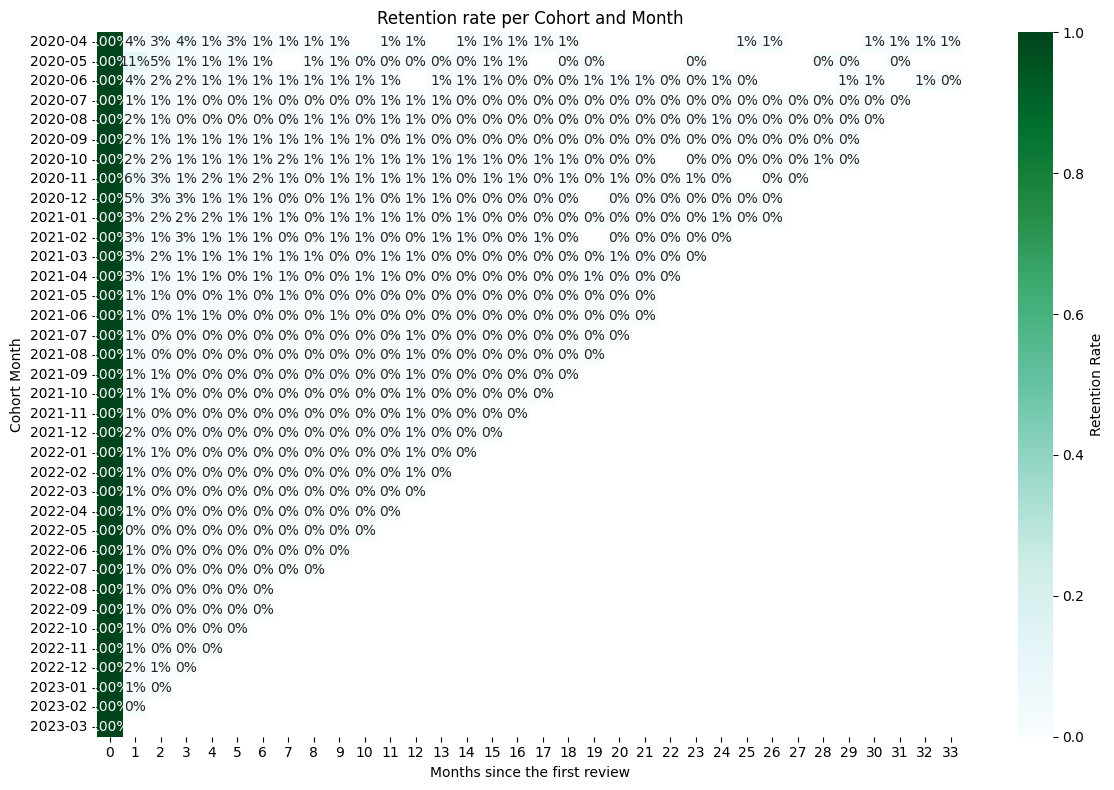

In [45]:
# Convertir a datetime
dfmerged_clean['date'] = pd.to_datetime(dfmerged_clean['date'])

# Crear columna con mes de la fecha (normalizado al primer día del mes)
dfmerged_clean['review_month'] = dfmerged_clean['date'].dt.to_period('M')

# Cohorte: primer mes en que cada cliente hizo una review
dfmerged_clean['cohort'] = dfmerged_clean.groupby('reviewer_id')['review_month'].transform('min')

# Diferencia en meses entre la fecha actual y la cohorte
dfmerged_clean['cohort_index'] = (dfmerged_clean['review_month'] - dfmerged_clean['cohort']).apply(attrgetter('n'))

# Por ejemplo: analizar solo datos desde el Covid-19
dfmerged_clean = dfmerged_clean[dfmerged_clean['review_month'] >= pd.Period('2020-04', freq='M')]

# Crear tabla de retención
cohort_data = (
    dfmerged_clean.groupby(['cohort', 'cohort_index'])
    .agg(num_users=('reviewer_id', 'nunique'))
    .reset_index()
)

# Tamaño inicial de cada cohorte
initial_users = cohort_data[cohort_data['cohort_index'] == 0][['cohort', 'num_users']]
initial_users = initial_users.rename(columns={'num_users': 'cohort_size'})

# Merge para calcular la tasa
cohort_data = cohort_data.merge(initial_users, on='cohort')
cohort_data['retention_rate'] = cohort_data['num_users'] / cohort_data['cohort_size']

# Pivot para heatmap
retention = cohort_data.pivot(index='cohort', columns='cohort_index', values='retention_rate')

# Graficar
plt.figure(figsize=(12, 8))
plt.title('Retention rate per Cohort and Month')
sns.heatmap(retention, annot=True, fmt='.0%', cmap='BuGn', vmin=0.0, vmax=1.0, cbar_kws={'label': 'Retention Rate'})
plt.ylabel('Cohort Month')
plt.xlabel('Months since the first review')
plt.tight_layout()
plt.show()

2. Cohortes del LTV de los hosts, para medir ingresos por host en el tiempo.

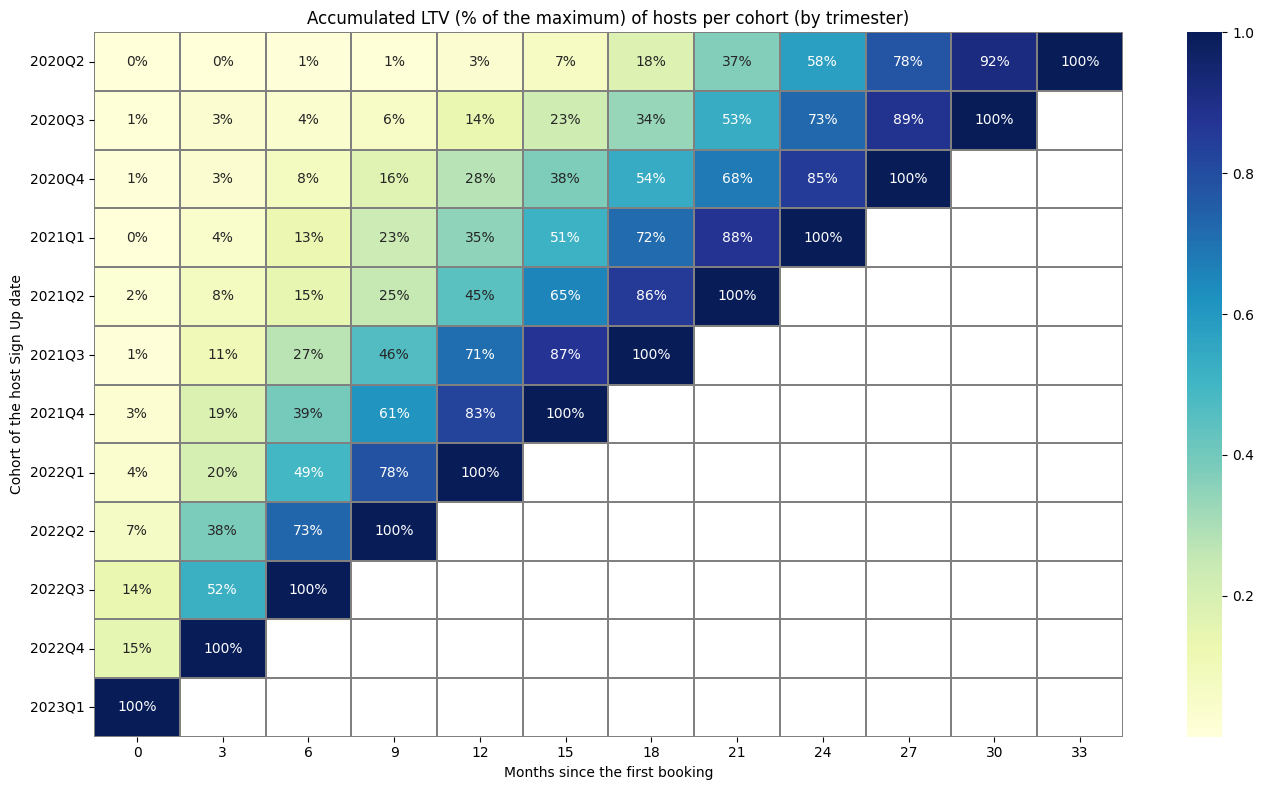

In [47]:
# Asegurar formato de fechas
dfmerged_clean['date'] = pd.to_datetime(dfmerged_clean['date'])
dfmerged_clean['host_since'] = pd.to_datetime(dfmerged_clean['host_since'])

# Extraer cohorte y periodo en trimestres
dfmerged_clean['host_cohort'] = dfmerged_clean['host_since'].dt.to_period('Q')
dfmerged_clean['period'] = dfmerged_clean['date'].dt.to_period('Q')

# Asegurarse de que 'price' sea float
dfmerged_clean['price'] = dfmerged_clean['price'].replace('[\$,]', '', regex=True).astype(float)

# Agrupación para calcular ingresos
ltv = dfmerged_clean.groupby(['host_cohort', 'period'])['price'].sum().reset_index()

# Calcular meses desde cohorte
ltv['months_since_cohort'] = (
    (ltv['period'].dt.year - ltv['host_cohort'].dt.year) * 12 +
    (ltv['period'].dt.quarter - ltv['host_cohort'].dt.quarter) * 3
)

# Filtrar cohortes recientes desde la pandemia
ltv = ltv[ltv['host_cohort'] >= '2020Q2']

# Filtrar solo valores válidos (evita negativos)
ltv = ltv[ltv['months_since_cohort'] >= 0]

# Pivot table para LTV acumulado
ltv_pivot = ltv.pivot_table(index='host_cohort', columns='months_since_cohort', values='price', aggfunc='sum')
ltv_cumulative = ltv_pivot.cumsum(axis=1)

# Calcular porcentaje respecto al valor máximo por cohorte
ltv_percentage = ltv_cumulative.div(ltv_cumulative.max(axis=1), axis=0)

# Visualizar como heatmap con porcentajes
plt.figure(figsize=(14, 8))
sns.heatmap(ltv_percentage, cmap="YlGnBu", annot=True, fmt=".0%", linewidths=0.3, linecolor='gray')
plt.title('Accumulated LTV (% of the maximum) of hosts per cohort (by trimester)')
plt.xlabel('Months since the first booking')
plt.ylabel('Cohort of the host Sign Up date')
plt.tight_layout()
plt.show()

Podemos apreciar como indicaba el gráfico de barras que hemos hecho antes en el EDA, que el pico de solicitudes de Airbnb en Barcelona fueron por 2021/2022. Esto hace que en todo tipo de host, los cohortes aumenten drásticamente en ese periodo. Independientemente de si son de 2020 o de 2021 al principio.

Vemos que todos los hosts que se crearon antes del 2022 tuvieron un LTV muy positivo para la plataforma ya que después de haber pasado por la sequía de 2020 y 2021 pudieron absorber muchísima demanda y su valor de LTV ascienda a >80%.

Recordemos que LTV = ingresos_totales_por_host / cantidad_total_de_hosts_en_cohorte

Los insight clave, es que a partir de 2020Q2 (post-COVID):
1.  **Se observan picos de nuevos usuarios en algunos trimestres, pero con rápida caída de retención en trimestres posteriores**.

2. **Los hosts activos desde el 2020Q2 tienen un crecimiento acumulado más rápido de ingresos**.

3. **Algunos cohortes muestran estancamiento o caída tras 2–3 trimestres, reflejando abandono o baja actividad**.


***Recomendación***: Incentivar a hosts nuevos con bonos escalables por mantener actividad tras los primeros trimestres y monitorizar el rendimiento trimestral para prevenir abandono.

3. Porcentaje de retención de los hosts, basado en si siguen activos haciendo publicaciones o recibiendo reviews.

<ipython-input-49-866119765>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



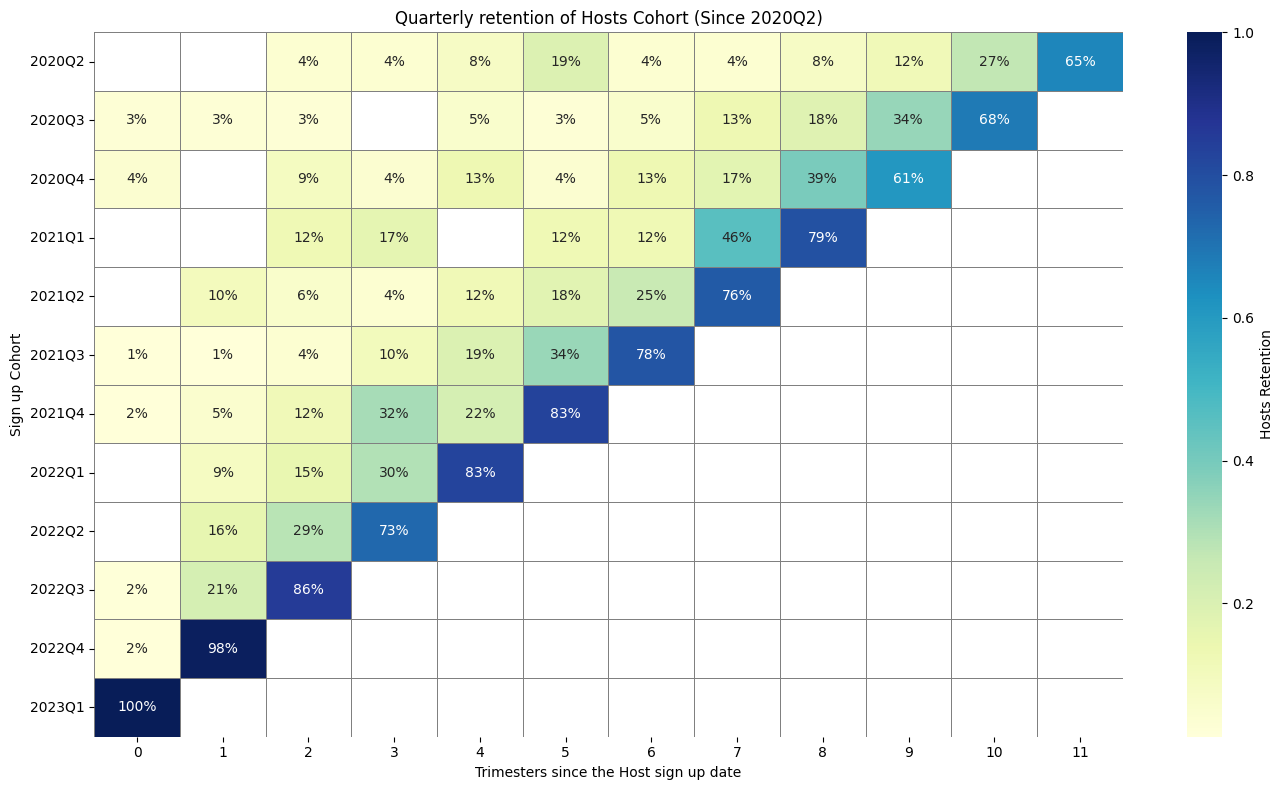

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir columnas de fecha
dfmerged_clean['host_since'] = pd.to_datetime(dfmerged_clean['host_since'])
dfmerged_clean['last_review'] = pd.to_datetime(dfmerged_clean['last_review'])

# Crear columnas trimestrales
dfmerged_clean['cohorte'] = dfmerged_clean['host_since'].dt.to_period('Q')
dfmerged_clean['review_period'] = dfmerged_clean['last_review'].dt.to_period('Q')

# Filtrar solo cohortes desde 2020Q2 en adelante
df_cohort_filtered = dfmerged_clean[dfmerged_clean['cohorte'] >= pd.Period('2020Q2')]

# Calcular edad del host en trimestres (desde alta hasta última review)
df_cohort_filtered['edad'] = (df_cohort_filtered['review_period'] - df_cohort_filtered['cohorte']).apply(lambda x: x.n)

# Filtrar registros con last_review válido
df_review_valid = df_cohort_filtered.dropna(subset=['last_review'])

# Número de hosts activos por cohorte y edad
hosts_activos = df_review_valid.groupby(['cohorte', 'edad'])['host_id'].nunique().reset_index(name='hosts_activos')

# Total de hosts por cohorte (base para calcular %)
tam_cohorte = df_cohort_filtered.groupby('cohorte')['host_id'].nunique()

# Calcular retención por cohorte
hosts_activos['retencion'] = hosts_activos.apply(lambda x: x['hosts_activos'] / tam_cohorte.loc[x['cohorte']], axis=1)

# Pivot para heatmap
retencion_pivot = hosts_activos.pivot(index='cohorte', columns='edad', values='retencion')

# Eliminar edades negativas si las hubiera
retencion_pivot = retencion_pivot.loc[:, retencion_pivot.columns >= 0]

# 📊 Graficar heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(retencion_pivot,
            annot=True, fmt=".0%", cmap="YlGnBu",
            cbar_kws={'label': 'Hosts Retention'},
            linewidths=0.5, linecolor='gray')

plt.title('Quarterly retention of Hosts Cohort (Since 2020Q2)')
plt.xlabel('Trimesters since the Host sign up date')
plt.ylabel('Sign up Cohort')
plt.tight_layout()
plt.show()


<ipython-input-51-721844575>:30: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



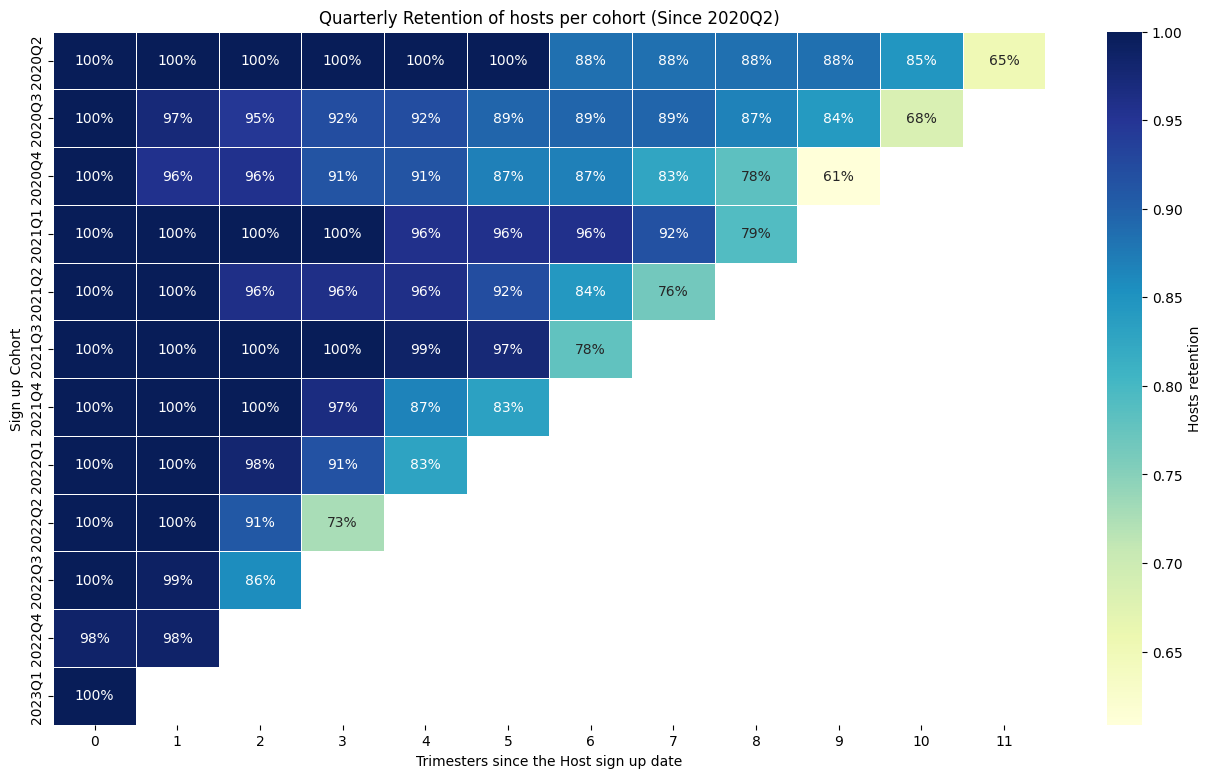

In [51]:
# Asegurar formato de fechas
dfmerged_clean['host_since'] = pd.to_datetime(dfmerged_clean['host_since'], errors='coerce')
dfmerged_clean['last_review'] = pd.to_datetime(dfmerged_clean['last_review'], errors='coerce')

# Crear columna de cohorte (trimestre en que se dio de alta el host)
dfmerged_clean['host_cohort'] = dfmerged_clean['host_since'].dt.to_period('Q')

# Crear columna de trimestre de actividad (última review en cada trimestre)
dfmerged_clean['last_active_quarter'] = dfmerged_clean['last_review'].dt.to_period('Q')

# Filtrar desde 2020Q2
dfmerged_clean = dfmerged_clean[dfmerged_clean['host_cohort'] >= '2020Q2']

# Inicializar estructura de cohortes
cohort_sizes = dfmerged_clean.groupby('host_cohort')['host_id'].nunique()

# Crear estructura de retención
retention = pd.DataFrame()

for cohort in cohort_sizes.index:
    cohort_hosts = dfmerged_clean[dfmerged_clean['host_cohort'] == cohort]
    cohort_size = cohort_hosts['host_id'].nunique()

    for quarter in pd.period_range(cohort, dfmerged_clean['last_active_quarter'].max(), freq='Q'):
        active_hosts = cohort_hosts[cohort_hosts['last_active_quarter'] >= quarter]['host_id'].nunique()
        age = quarter - cohort  # cuántos trimestres han pasado
        retention.loc[str(cohort), age.n] = active_hosts / cohort_size

# Redondear para mostrar como porcentaje
retention_percent = retention.fillna(0).applymap(lambda x: f"{int(round(x * 100))}%")

# Graficar
plt.figure(figsize=(16, 9))
sns.heatmap(retention, annot=retention_percent, fmt='', cmap='YlGnBu', cbar_kws={'label': 'Hosts retention'}, linewidths=.5)

plt.title("Quarterly Retention of hosts per cohort (Since 2020Q2)")
plt.xlabel("Trimesters since the Host sign up date")
plt.ylabel("Sign up Cohort")
plt.show()

Se puede observar que a medida que nos acercamos a 2021Q1 los usuarios se mantienen, sin embargo en esa fecha se anunció el Plan Especial Urbanístico de Alojamientos Turísticos (PEUAT) que regulaba los habitajes turísticos anunciando que no se emitirian nuevas licencias y que tampoco se ampliarían su duración. También se delimitaban areas de la ciudad donde la duración del habitaje turístico se vería limitada aún más.

Esto hizo que aproximadamente un 15% de hosts abandonasen Airbnb en 2021 y antes de la llegada de 2022 practicamente un 25% desde la pandemia ya habian abandonado el sector antes de 2022.

El gran problema es que la mayoría de clientes únicos aparecieron a principios de 2022 cómo se ilustró en el EDA y esto hizo que estos host que abandonaron la plataforma se quedasen sin el periodo de máxima demanda de pisos turísticos en la ciudad.

***Recomendación***
1. La plataforma debería incentivar a aquellos usuarios que superen cierta cantidad de tiempo post regulación. Por ejemplo, 12 meses. También podría ofrecerse una reducción de comisiones de la plataforma a aquellos hosts que estén dispuestos a continuar conviviendo con la regulación.

2. Enfocarse a clientes más perfilados y no tanto de perfil turístico, cómo podrían ser nómadas digitales, trabajadores desplazados a habilitar directamente los apartamentos para hacer coliving.

3. Hacer módulos educativos y consultoría sobre cómo adaptar el negocio a las nuevas normativas.



4. Cohortes por tipo de habitación (ver si ciertos tipos de alojamiento mantienen mejor su actividad, precios, etc.).

Tomamos: room_type, host_since y last_review.

Agrupamos por cohortes trimestrales de alta (host_since) y tipo de habitación.

Calculamos retención: % de alojamientos activos (con last_review) en cada trimestre tras su alta.

Filtramos desde 2020Q2.

<ipython-input-52-2995882540>:31: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



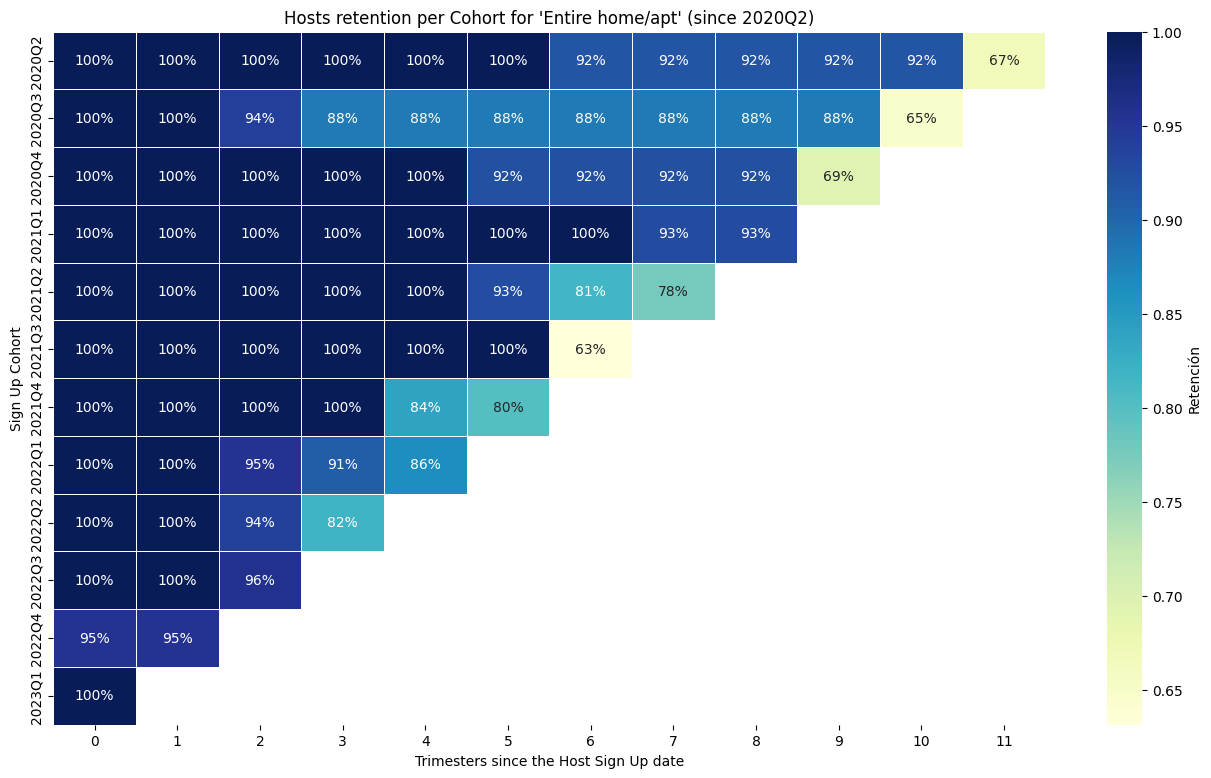

<ipython-input-52-2995882540>:31: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



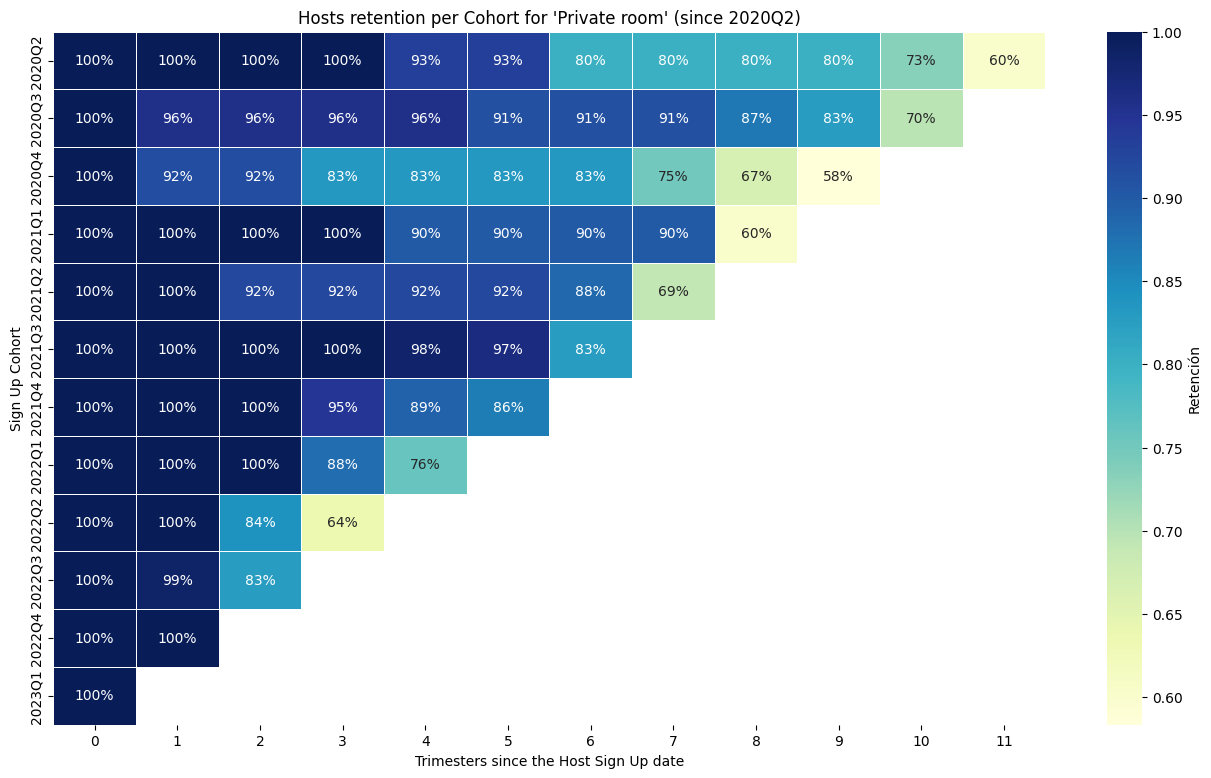

<ipython-input-52-2995882540>:31: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



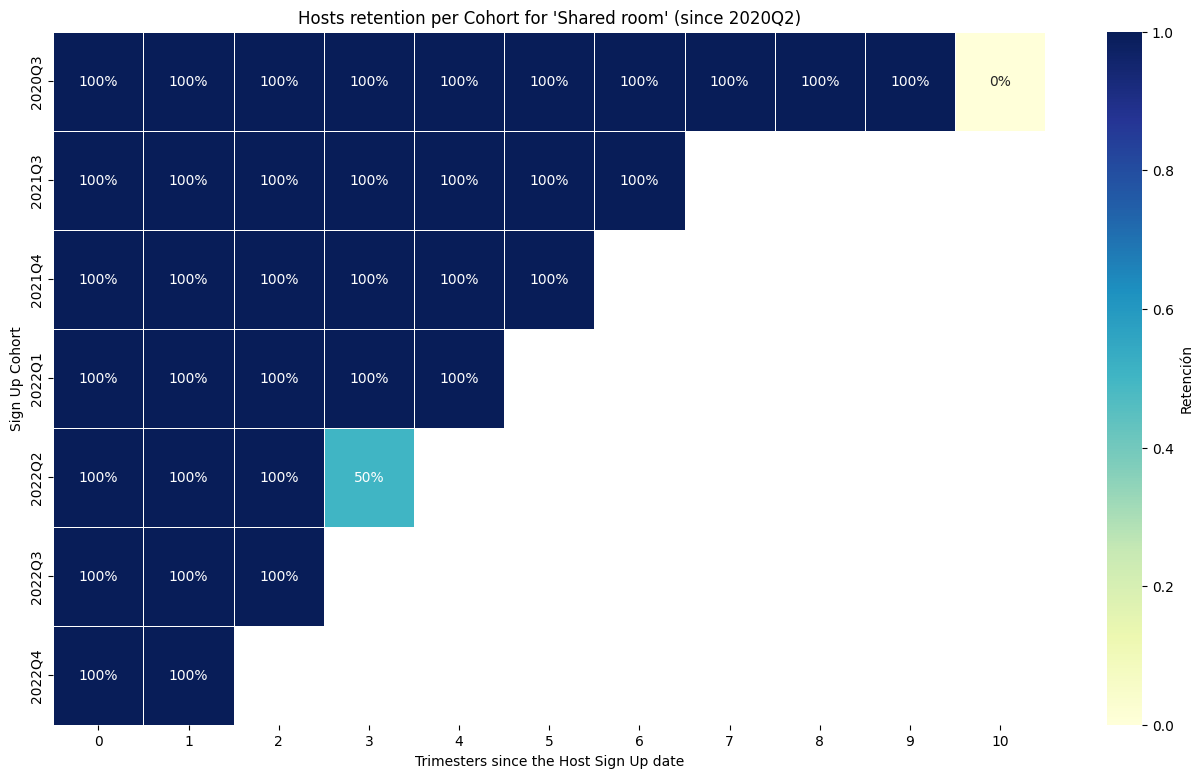

In [52]:
# Asegurarse del formato de fechas
dfmerged_clean['host_since'] = pd.to_datetime(dfmerged_clean['host_since'], errors='coerce')
dfmerged_clean['last_review'] = pd.to_datetime(dfmerged_clean['last_review'], errors='coerce')

# Crear columnas de cohorte y actividad trimestral
dfmerged_clean['host_cohort'] = dfmerged_clean['host_since'].dt.to_period('Q')
dfmerged_clean['last_active_quarter'] = dfmerged_clean['last_review'].dt.to_period('Q')

# Filtrar desde 2020Q2
df = dfmerged_clean[dfmerged_clean['host_cohort'] >= '2020Q2']

# Para cada tipo de habitación, crear un gráfico de cohortes
room_types = df['room_type'].unique()

for room in room_types:
    subset = df[df['room_type'] == room]
    cohort_sizes = subset.groupby('host_cohort')['host_id'].nunique()

    retention = pd.DataFrame()

    for cohort in cohort_sizes.index:
        cohort_hosts = subset[subset['host_cohort'] == cohort]
        cohort_size = cohort_hosts['host_id'].nunique()

        for quarter in pd.period_range(cohort, subset['last_active_quarter'].max(), freq='Q'):
            active_hosts = cohort_hosts[cohort_hosts['last_active_quarter'] >= quarter]['host_id'].nunique()
            age = quarter - cohort
            retention.loc[str(cohort), age.n] = active_hosts / cohort_size

    # Formatear como porcentaje
    retention_percent = retention.fillna(0).applymap(lambda x: f"{int(round(x * 100))}%")

    # Plot
    plt.figure(figsize=(16, 9))
    sns.heatmap(retention, annot=retention_percent, fmt='', cmap='YlGnBu', cbar_kws={'label': 'Retención'}, linewidths=.5)
    plt.title(f"Hosts retention per Cohort for '{room}' (since 2020Q2)")
    plt.xlabel("Trimesters since the Host Sign Up date")
    plt.ylabel("Sign Up Cohort")
    plt.show()

Con el tipo de habitaciones pasa algo muy correlacionado con el tipo de hosts y su tasa de retención. Al ser la mayoría de población de hosts propietario/a de pisos enteros, los valores no difieren mucho de la retención de hosts totales.